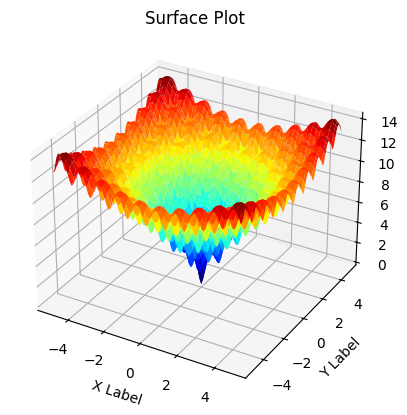

In [1]:
# ackley multimodal function
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize, dual_annealing, differential_evolution, Bounds

# objective function
def objective(x, y):
	return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
# Create a surface plot with the jet color scheme
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # This is the correct way to create 3D axes
ax.plot_surface(x, y, results, cmap='jet')

# Add labels and title if needed
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Surface Plot')

# Show the plot
plt.show()

In [2]:
...
# define the bounds on the search
bounds = [[r_min, r_max], [r_min, r_max]]

In [3]:
from scipy.optimize import dual_annealing

# Define wrapper function to include additional parameters
def wrapped_objective(params):
    # Unpack parameters if needed
    x, y = params  # Adjust based on your parameter structure
    return objective(x, y)  # Pass any additional fixed parameters here

# Define bounds for all parameters
bounds = [[r_min, r_max], [r_min, r_max]]  # Adjust bounds for your parameters

# Perform dual annealing with wrapped objective
result = dual_annealing(wrapped_objective, bounds)

In [7]:
...
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = wrapped_objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

Status : ['Maximum number of iteration reached']
Total Evaluations: 4307
Solution: f([-1.85711062e-09 -5.18968107e-09]) = 0.00000


In [8]:
# dual annealing global optimization for the ackley multimodal objective function
from scipy.optimize import dual_annealing
from numpy.random import rand
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi

# objective function
def objective(v):
	x, y = v
	return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

# define range for input
r_min, r_max = -5.0, 5.0
# define the bounds on the search
bounds = [[r_min, r_max], [r_min, r_max]]
# perform the dual annealing search
result = dual_annealing(objective, bounds)
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

Status : ['Maximum number of iteration reached']
Total Evaluations: 4286
Solution: f([-4.09450941e-09  2.50117254e-10]) = 0.00000
